In [2]:
#Imported all important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mat
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
#Read the data
hd=pd.read_csv('heart.csv')
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### PRE-PROCESSING

In [3]:
#Filled the missing values
hd['trestbps'].interpolate(method='linear', inplace=True)
hd['chol'].interpolate(method='linear', inplace=True)
hd['fbs'].fillna(hd['fbs'].mode()[0], inplace=True)
hd['exang'].fillna(hd['exang'].mode()[0], inplace=True)
hd['oldpeak'].interpolate(method='linear', inplace=True)
hd['slope'].fillna(hd['slope'].mode()[0], inplace=True)

#Dropped unwanted columns
hd=hd.drop('ca', axis=1)
hd=hd.drop('thal', axis=1)
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,52,1,0,125,212,0,1,168,0,1.0,2,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,0
4,62,0,0,138,294,1,1,106,0,1.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,1


#### ABOUT THE DATASET

<AxesSubplot:xlabel='age', ylabel='chol'>

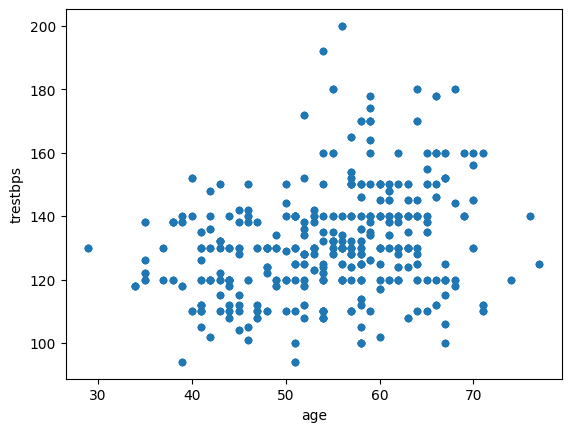

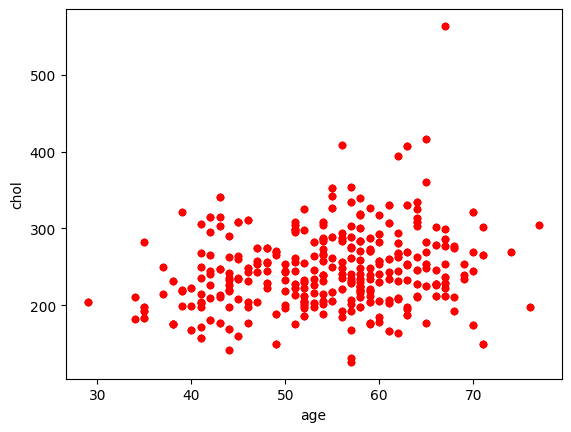

In [4]:
#Plotting the trestbps with age
hd.plot.scatter("age","trestbps")

#Plotting the cholestrol with age
hd.plot.scatter("age","chol",color="red")

#### CORRELATION HEATMAP

<AxesSubplot:>

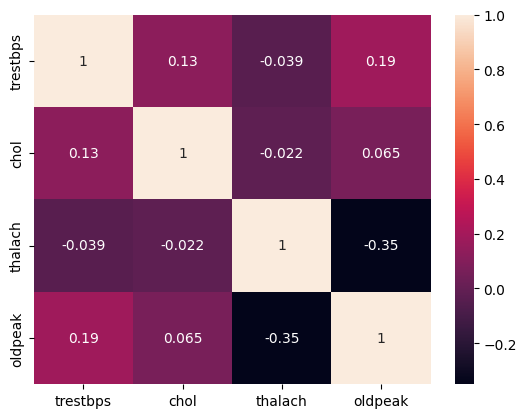

In [5]:
sns.heatmap(hd[['trestbps','chol','thalach','oldpeak']].corr(),annot=True)

#### FUNCTION FOR ACCURACY

In [6]:
#Function for accuracy
results=[]
def acc(testy,predy):
  print('Accuracy:', accuracy_score(testy,predy))
  print('Precision:', precision_score(testy,predy))
  print('Recall:', recall_score(testy,predy))
  print('F1-score:', f1_score(testy,predy))


#### XGBOOST

In [7]:
#Imported necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb

#X and Y values
X=hd.drop("target",axis=1)
y=hd["target"]

# Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

#Predicted the y values using the model
y_pred = xgb_model.predict(X_test)

#Accuracy
acc(y_test,y_pred)
results.append((accuracy_score(y_test,y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred),f1_score(y_test, y_pred)))



Accuracy: 0.9805194805194806
Precision: 1.0
Recall: 0.959731543624161
F1-score: 0.9794520547945206


#### MULTI LAYER PERCEPTRON (FEED FORWARD NEURAL NETWORK)

In [8]:
#Imported necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.neural_network import MLPClassifier

#X and Y values
X=hd.drop("target",axis=1)
y=hd["target"]

# Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build neural network model
model2 = Sequential()
model2.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

# Compile model
optimizer = Adam(learning_rate=0.001)
model2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train model
history = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Make predictions on testing set
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)
mlp_model = MLPClassifier(hidden_layer_sizes=(16,8), max_iter=1000)

# Evaluate model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))
acc(y_test,y_pred2)
results.append((accuracy_score(y_test,y_pred2),precision_score(y_test, y_pred2), recall_score(y_test, y_pred2),f1_score(y_test, y_pred2)))


Epoch 1/100


c:\Users\91965\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


24/24 [==============================] - 1s 9ms/step - loss: 0.6467 - accuracy: 0.6341 - val_loss: 0.6164 - val_accuracy: 0.7195
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7846 - val_loss: 0.5607 - val_accuracy: 0.7805
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5047 - accuracy: 0.8130 - val_loss: 0.5162 - val_accuracy: 0.7927
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.8117 - val_loss: 0.4806 - val_accuracy: 0.7927
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.8211 - val_loss: 0.4589 - val_accuracy: 0.8049
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8306 - val_loss: 0.4392 - val_accuracy: 0.8171
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8537 - val_loss: 0.4225 - val_accuracy: 0.8415
Epoch 8/100
24/24 [======

#### ADABOOST

In [9]:
#Imported necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#X and Y values
X=hd.drop("target",axis=1)
y=hd["target"]

# Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

# Define the AGABoost model
model3 = AdaBoostClassifier(
    n_estimators=1,
    learning_rate=0.3,
    random_state=1,
    base_estimator=RandomForestClassifier()
)

# Train the model
model3.fit(X_train, y_train)

# Evaluate the model
score = model3.score(X_test,y_test)

#Predicted y values
y_pred3=model3.predict(X_test)

#Accuracy
print('Accuracy:', score)
results.append((accuracy_score(y_test,y_pred3),precision_score(y_test, y_pred3), recall_score(y_test, y_pred3),f1_score(y_test, y_pred3)))

Accuracy: 0.9853658536585366


#### LIGHTGBM

In [10]:
#Imported the library
import lightgbm as lgb

#Prepared the training data
train_data = lgb.Dataset(X_train, label=y_train)

#Defined the parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'force_row_wise':'true'
}

#Train the model
lgb_model = lgb.train(params, train_data,100)

#Predict values using the model
y_pred4 = lgb_model.predict(X_test)

#Define the classifier
lgbm_model=lgb.LGBMClassifier()

#Rounded prediction
y_pred_binary = [round(x) for x in y_pred4]

#Print the accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)
results.append((accuracy_score(y_test,y_pred_binary),precision_score(y_test,y_pred_binary), recall_score(y_test,y_pred_binary),f1_score(y_test,y_pred_binary)))


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

#### WEIGHTED BAGGING OF ALL MODELS

In [11]:
#Imported all important libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Split data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.4,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

# Create the voting classifier
voting_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('mlp', mlp_model), ('ada', model3), ('lgbm', lgbm_model)],
    voting='hard',
    weights=(30, 10, 40, 20)
)

# Train the voting classifier on the training data
voting_model.fit(X_train, y_train)

# Evaluate the voting classifier on the validation data
# y_pred = voting_model.predict(X_val)
# accuracy = accuracy_score(y_val, y_pred)
# print('Accuracy on validation set:', accuracy)

# Tune hyperparameters using validation set

# Evaluate the voting classifier on the test data
y_pred = voting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test set:', accuracy)


Accuracy on test set: 0.9682926829268292


#### COMBINED ACCURACY OF ALL MODELS

In [12]:
dict={"Model Name":["Accuracy","Precision","Recall","F1"],
      "XGBoost":results[0],
      "MultiLayer Perceptron":results[1],
      "ADABoost":results[2],
      "LightBGM":results[3]}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
display(df)     

,Model Name,XGBoost,MultiLayer Perceptron,ADABoost,LightBGM
0,Accuracy,0.980519,0.917073,0.985366,0.956098
1,Precision,1.000000,0.883929,1.000000,0.989691
2,Recall,0.959732,0.961165,0.971154,0.923077
3,F1,0.979452,0.920930,0.985366,0.955224


#### MODEL PREDICTION

In [ ]:
# age=int(input())
# sex=int(input())
# cp=int(input())	
# trestbps=int(input())	
# chol=int(input())	
# fbs=int(input())	
# restecg=int(input())	
# thalach=int(input())	
# exang=int(input())	
# oldpeak=float(input())	
# slope=int(input())
# ca=int(input())
# thal=int(input())	
new_data = pd.DataFrame({'age': [60], 'sex': [1], 'cp': [0], 'trestbps': [125], 'chol': [258], 'fbs': [0], 'restecg': [0], 'thalach': [141], 'exang': [1], 'oldpeak': [2.8], 'slope': [1]})
prediction = voting_model.predict(new_data)
print("Prediction:", prediction)

Prediction: [0]
